# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.3, palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [3]:
import warnings

warnings.filterwarnings('ignore')

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.*
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение**:

(1) Предположим, данные получены по правилу $y_i=\theta x_i+\varepsilon_i$, где $i \in\{1, \ldots, n\}$, числа $x_i \in \mathbb{R}$- неслучайны; $\varepsilon_i$ - случайные ошибки.


(2) Выпишем формулы итераций GD и SGD для поиска $\hat{\theta}$. 

Пусть $F(\theta)=\|Y-\theta x\|^2$ - функция потерь. Посчитаем $\nabla F(\theta)$ :
$$
\begin{aligned}
& F(\theta)=(Y-X \theta)^{\top} \cdot(Y-X \theta)=Y^{\top} Y-2 Y^{\top} X \theta+\theta^{\top} X X \theta . \\
& \nabla F(\theta)=-2 Y X^{\top}+2 X^{\top} X \theta=2 X^{\top} \cdot(X \theta-Y)=2 \cdot \sum_{k=1}^n x_k \cdot\left(x_k \cdot \theta-y_k\right).
\end{aligned}
$$


$G D: \theta_{t+1}=\theta_t-\eta \cdot \nabla F(\theta)=\theta_t-\eta \sum_{k=1}^n x_k\left(x_k \theta-y_k\right)$.


$S G D: \theta_{t+1}=\theta_t-\eta \sum_{k \in I} X_k\left(X_k \cdot \theta-y_k\right)$, где $I=\left\{k_1, \ldots, k_m\right\}$, $\left.k_1, \ldots, k_m \sim U_{\{1}, \ldots, n\right\}$.

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv("dataset.csv")
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [5]:
data = data[
    [
        "season",
        "mnth",
        "holiday",
        "weekday",
        "workingday",
        "weathersit",
        "temp",
        "atemp",
        "hum",
        "windspeed",
        "cnt",
    ]
]
data

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed   cnt  
0    0.363625  0.805833   0.160446   985  
1    0.353739  0.696087   0.248539   801  
2    0.189405  0.437273   0.248309  1349  
3    0.212122  0.590435   0.160296  1562  
4    0.229270  0.436957   0.186900  1600  
..        ...       ...        ...   ...  
726  0.226642  0.652917   0.350133  2114  
727  0.255046  0.590000   0.155471  3095  
728  0.242400  0.752917   0.124383  1341  
729  0.231700  0.483333   0.350754  1796  
730  0.223487  0.577500   0.154846  2729  

[731 rows x 11 columns]

In [6]:
train, test = train_test_split(data, train_size=0.8)
print("Размер обучающей выборки:", train.shape)
print("Размер тестовой выборки:", test.shape)

Размер обучающей выборки: (584, 11)
Размер тестовой выборки: (147, 11)


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Выделим категориальный и вещественные признаки, а также, целевую переменнную:

In [7]:
real_features = ["temp", "atemp", "hum", "windspeed"]
categorial_features = [
    "season",
    "mnth",
    "holiday",
    "weekday",
    "workingday",
    "weathersit",
]
target = "cnt"

Построим графики:

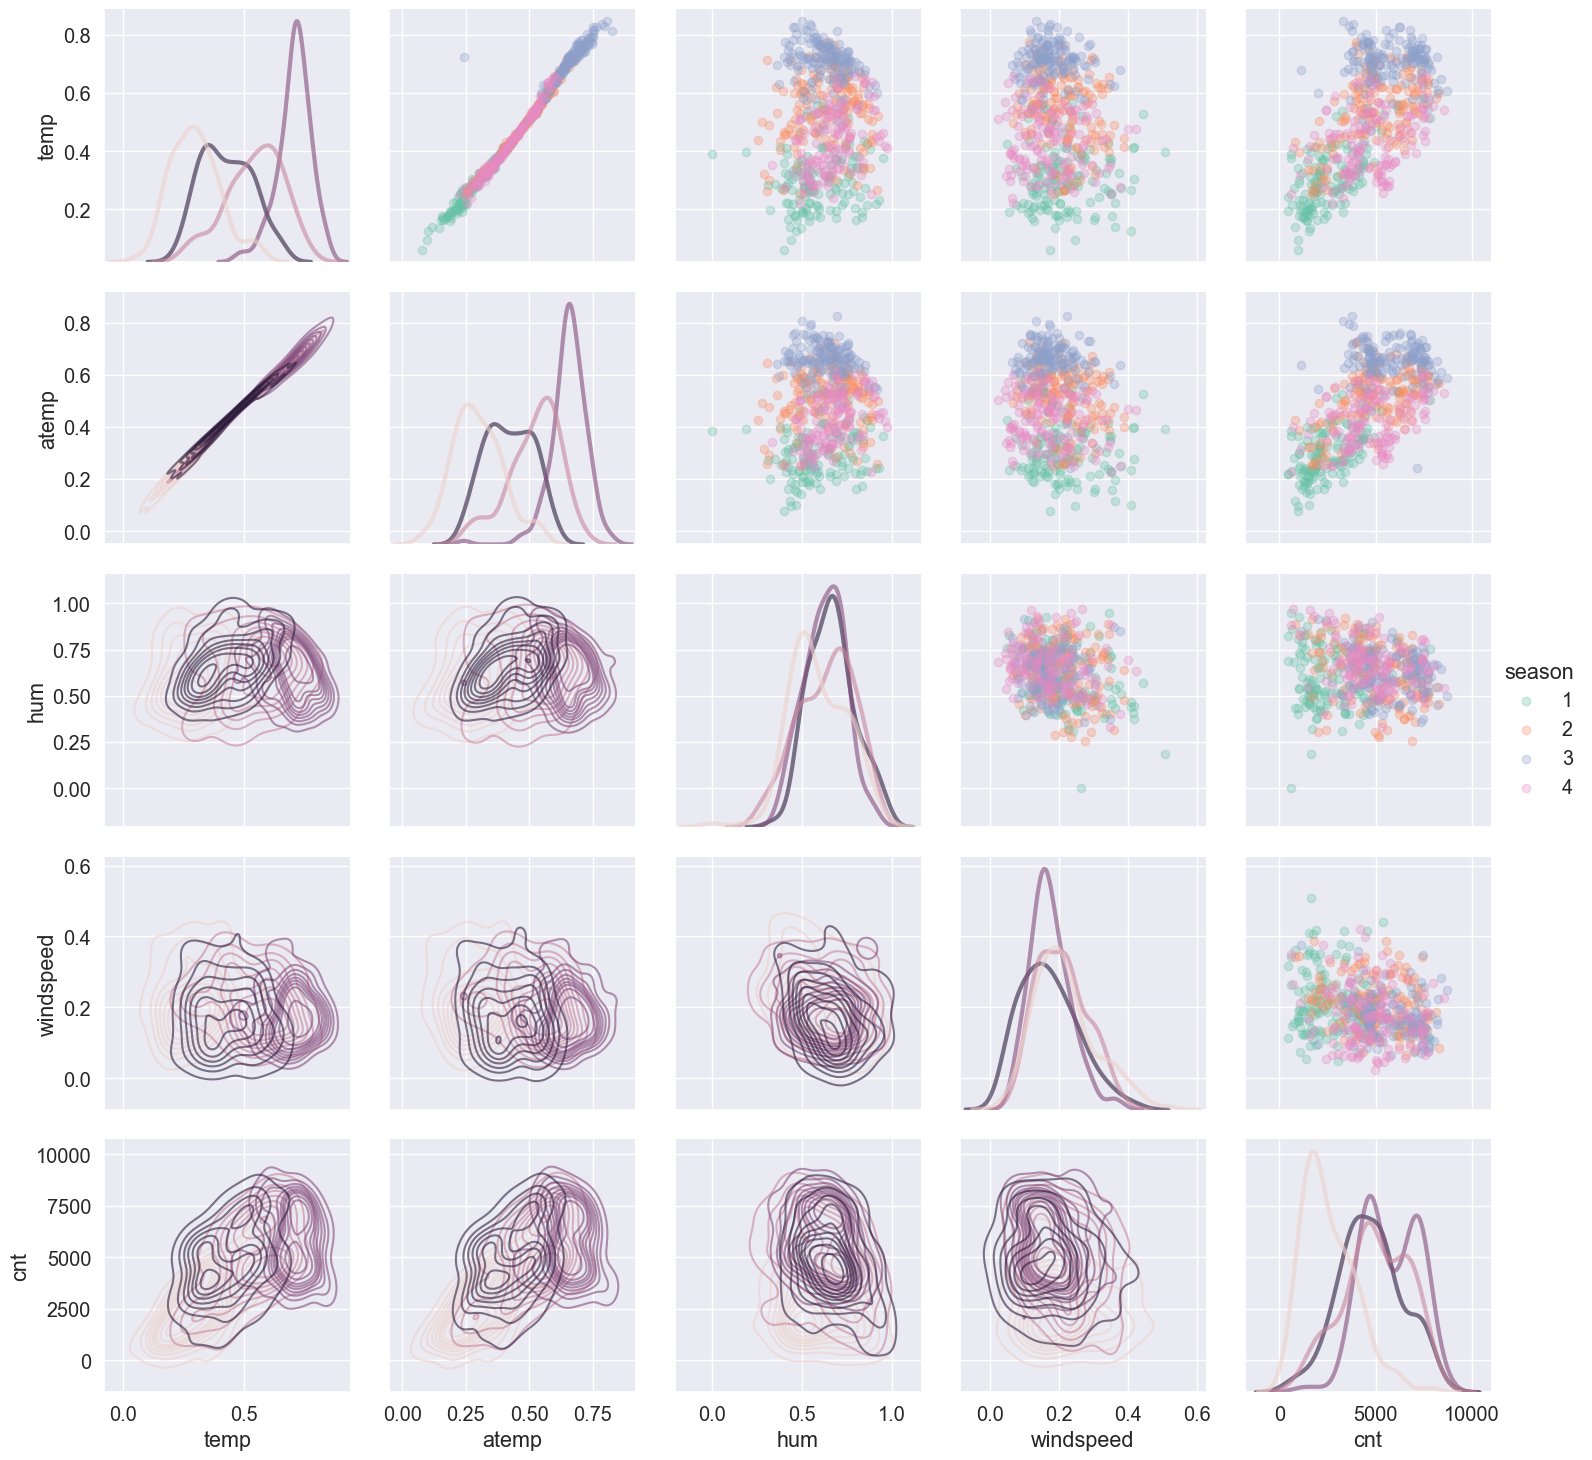

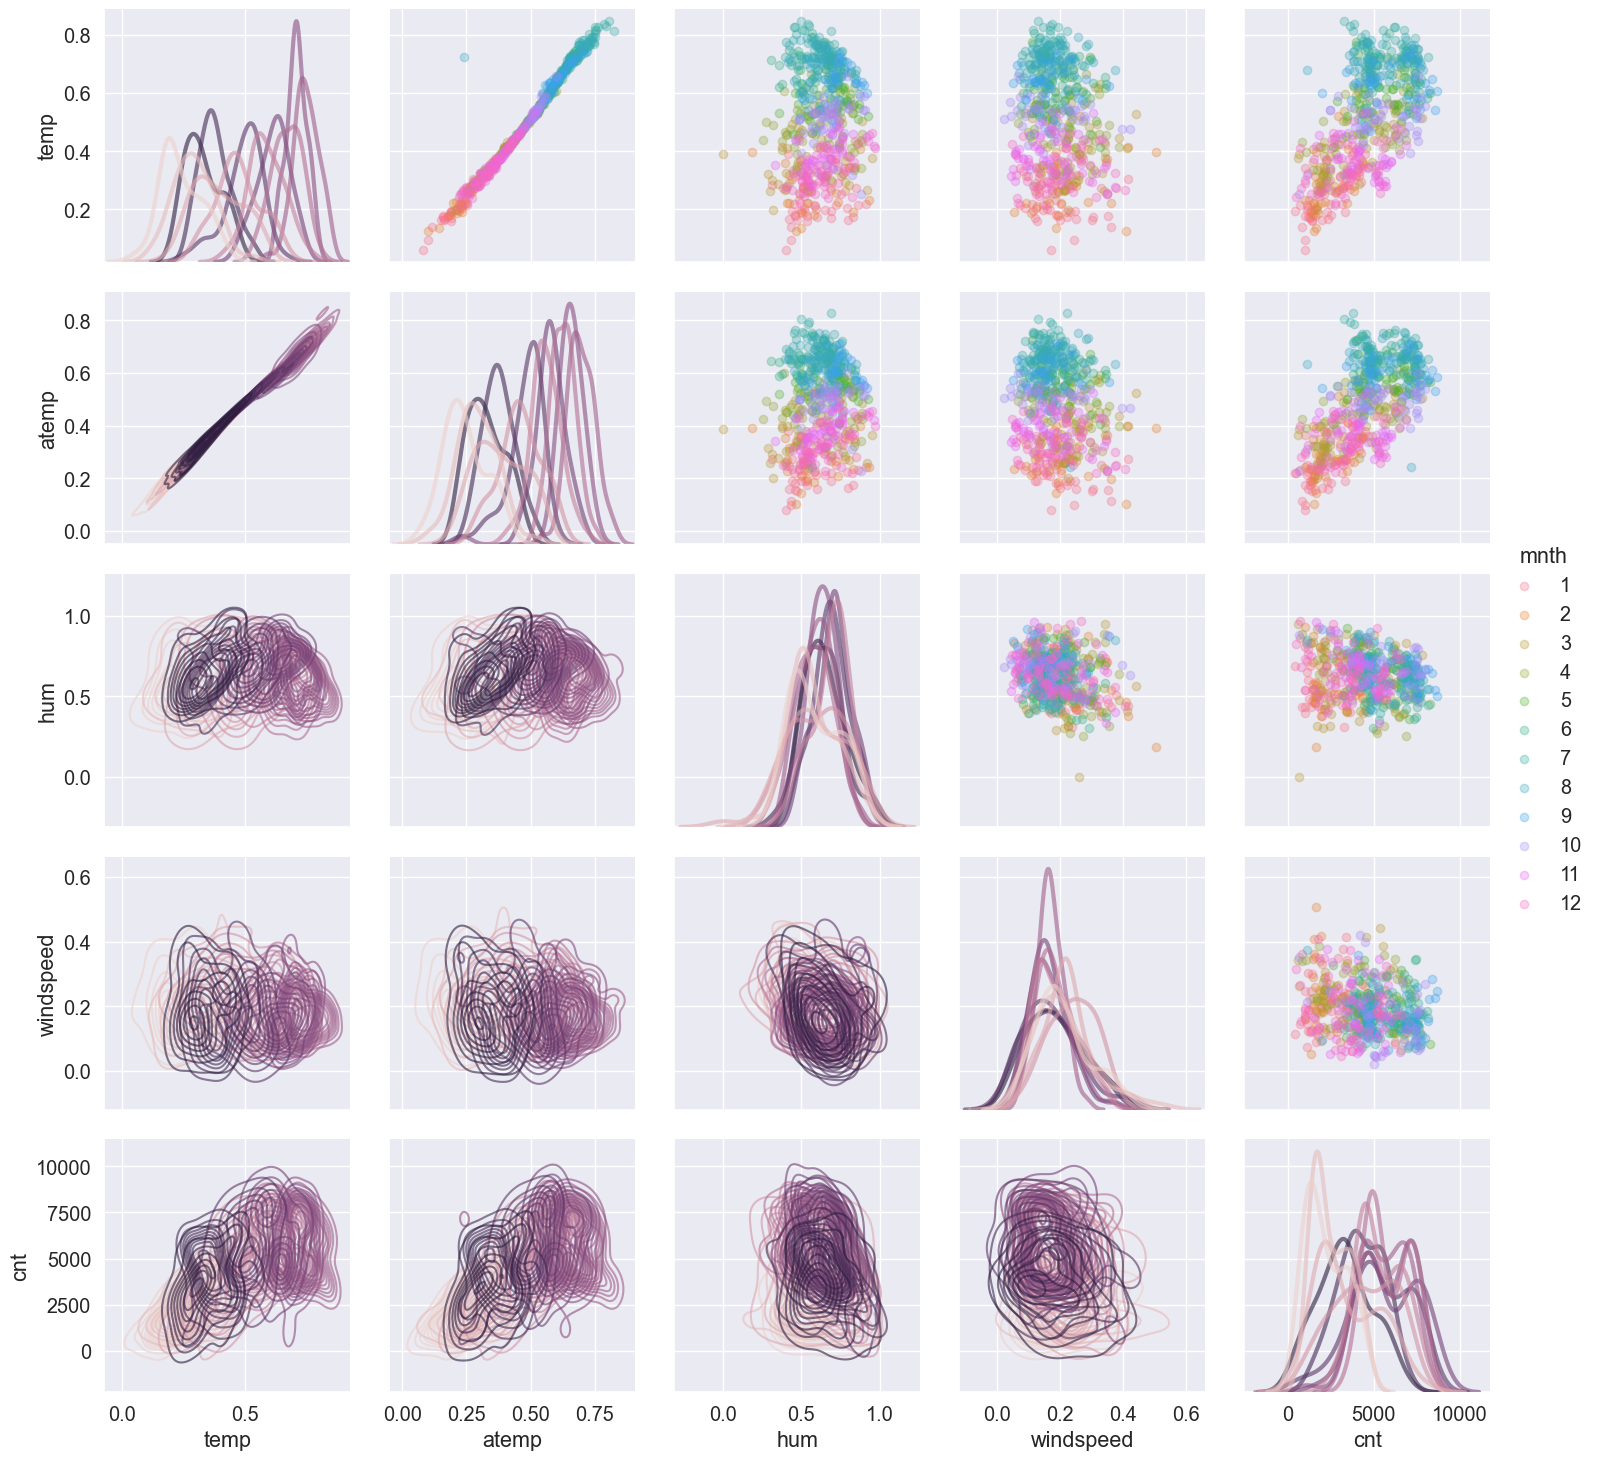

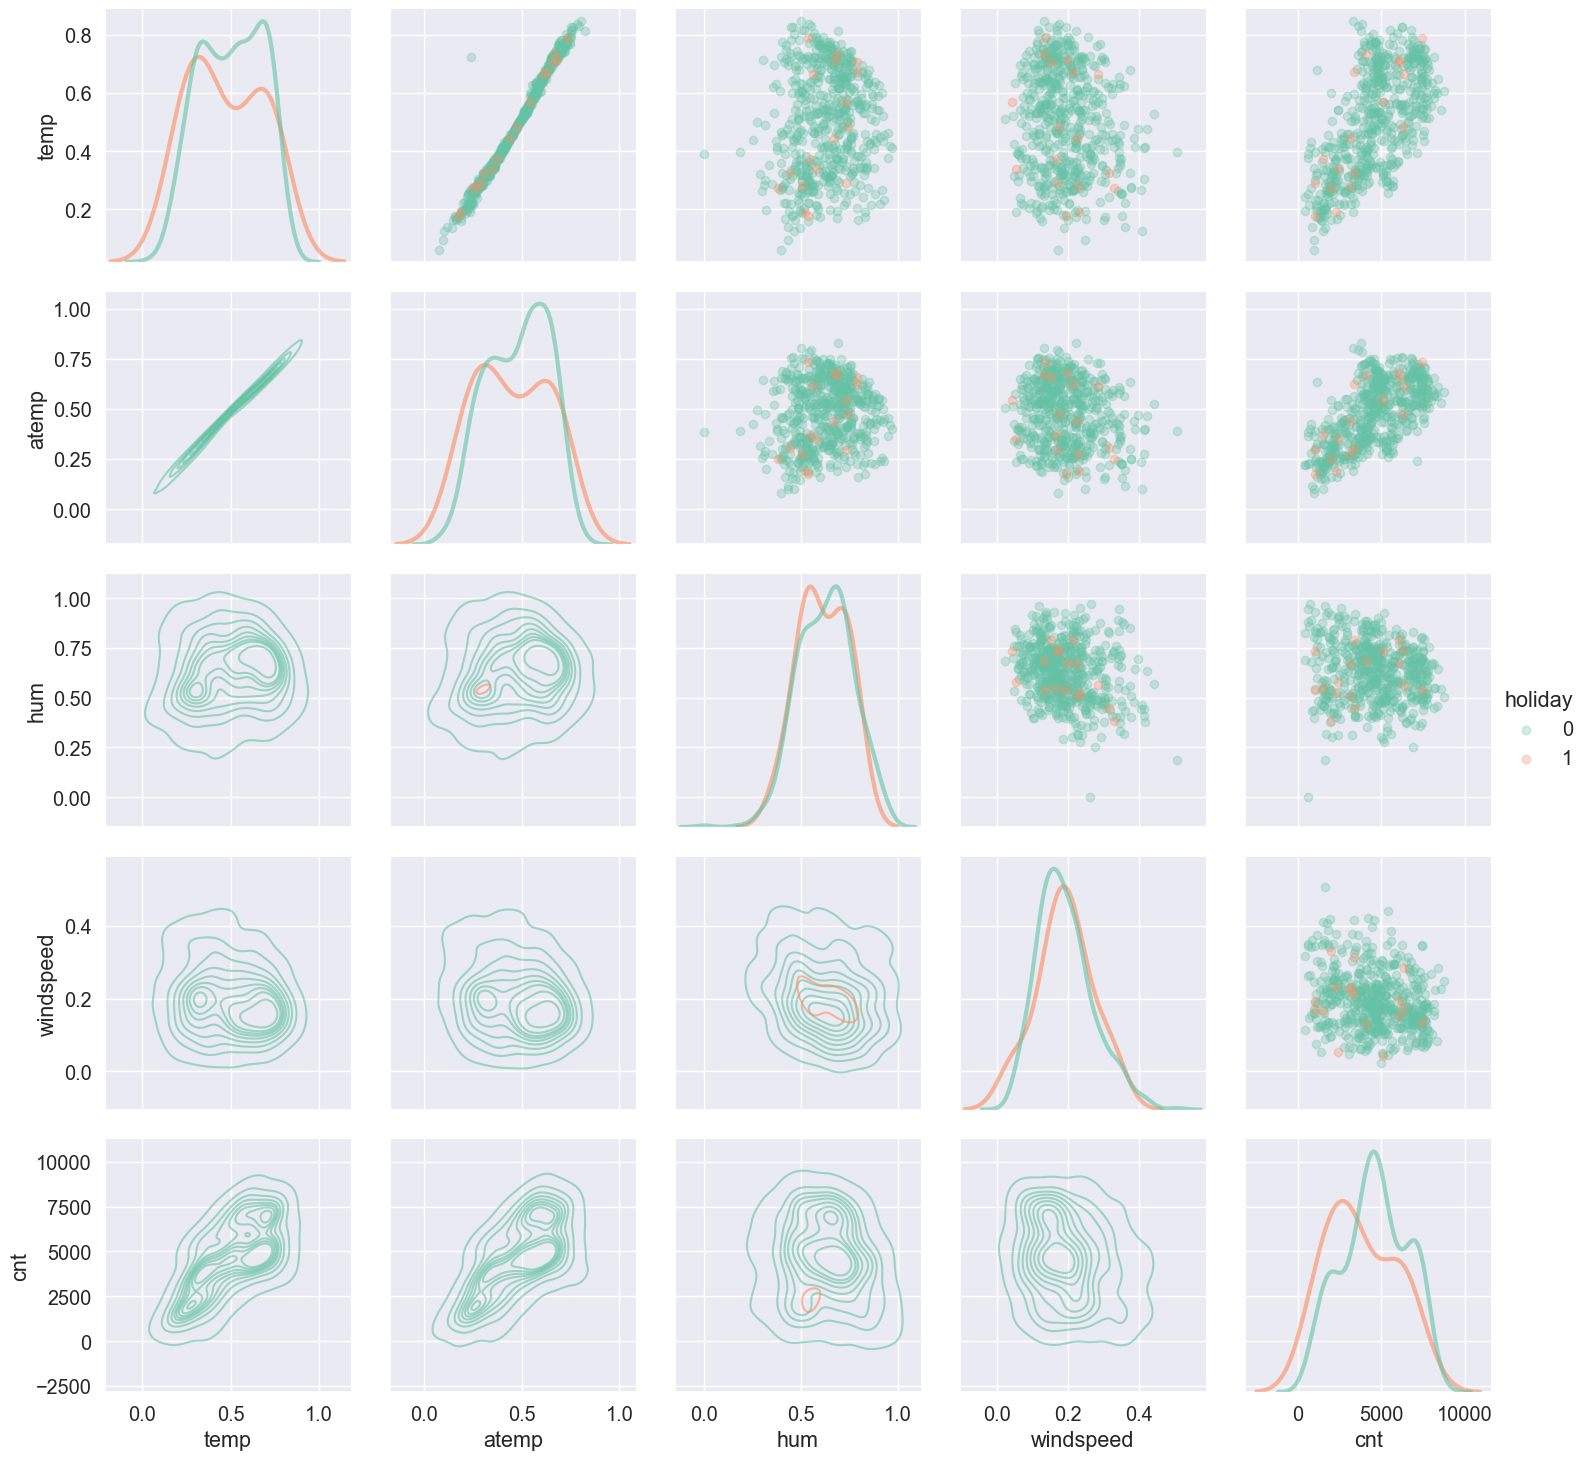

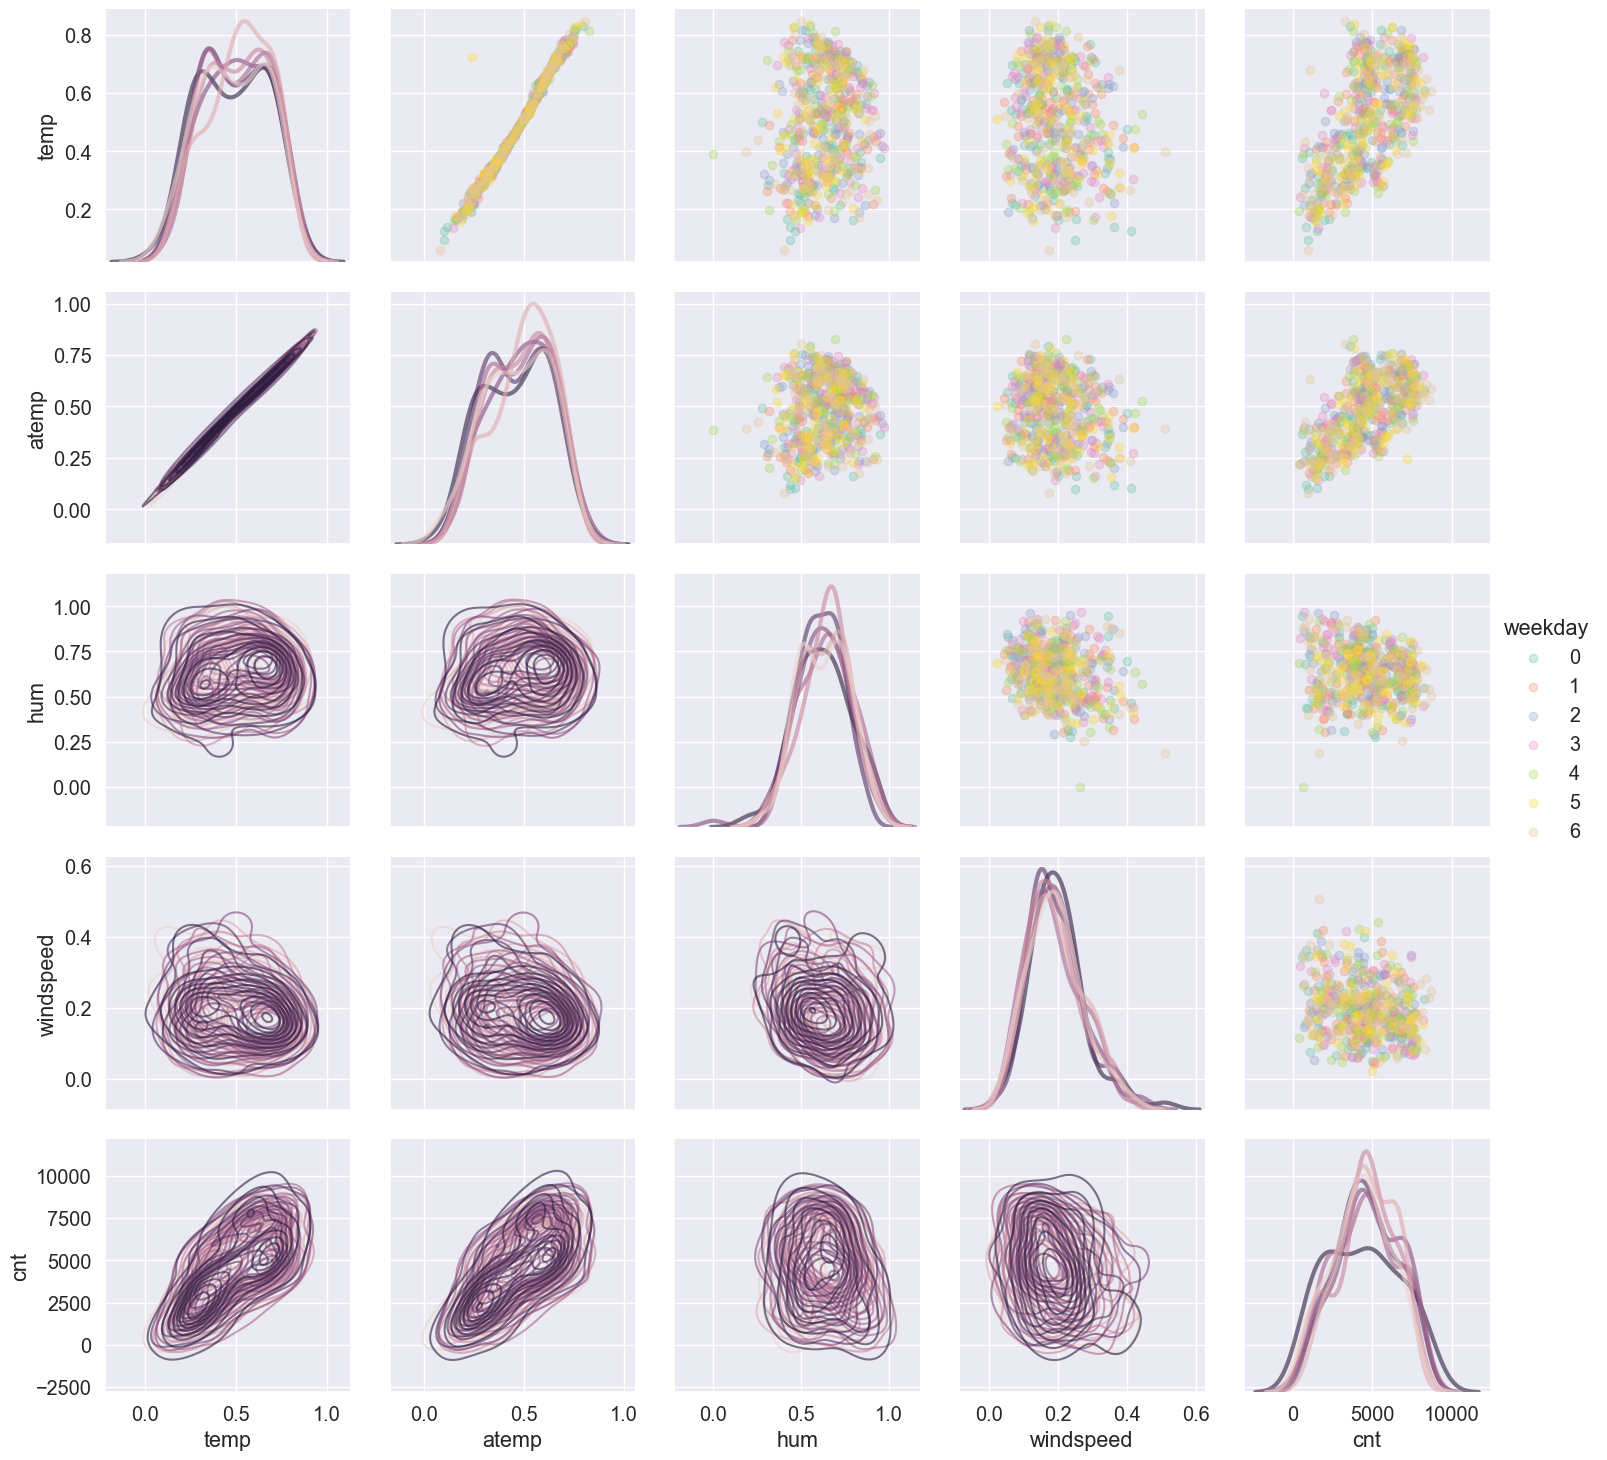

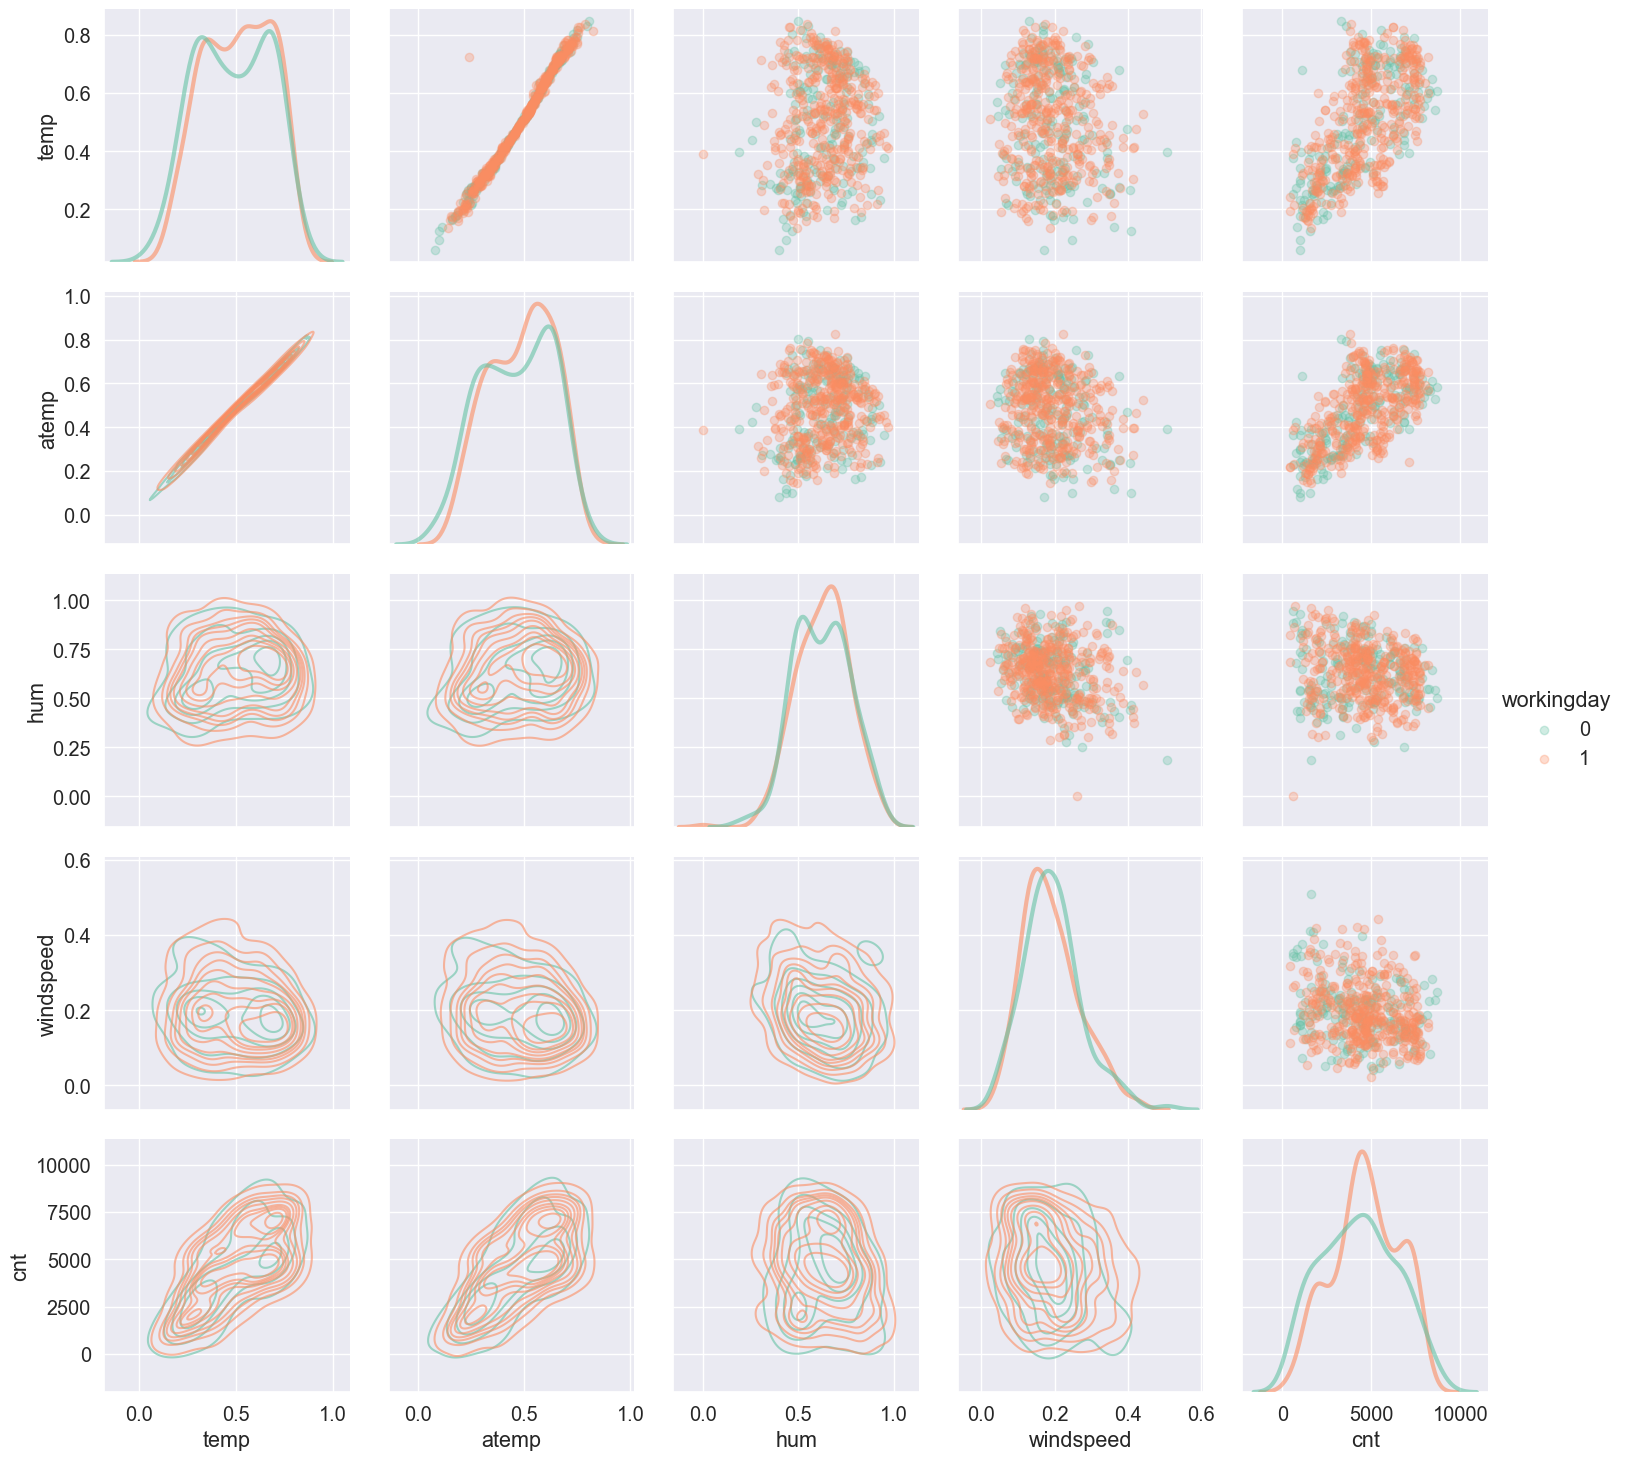

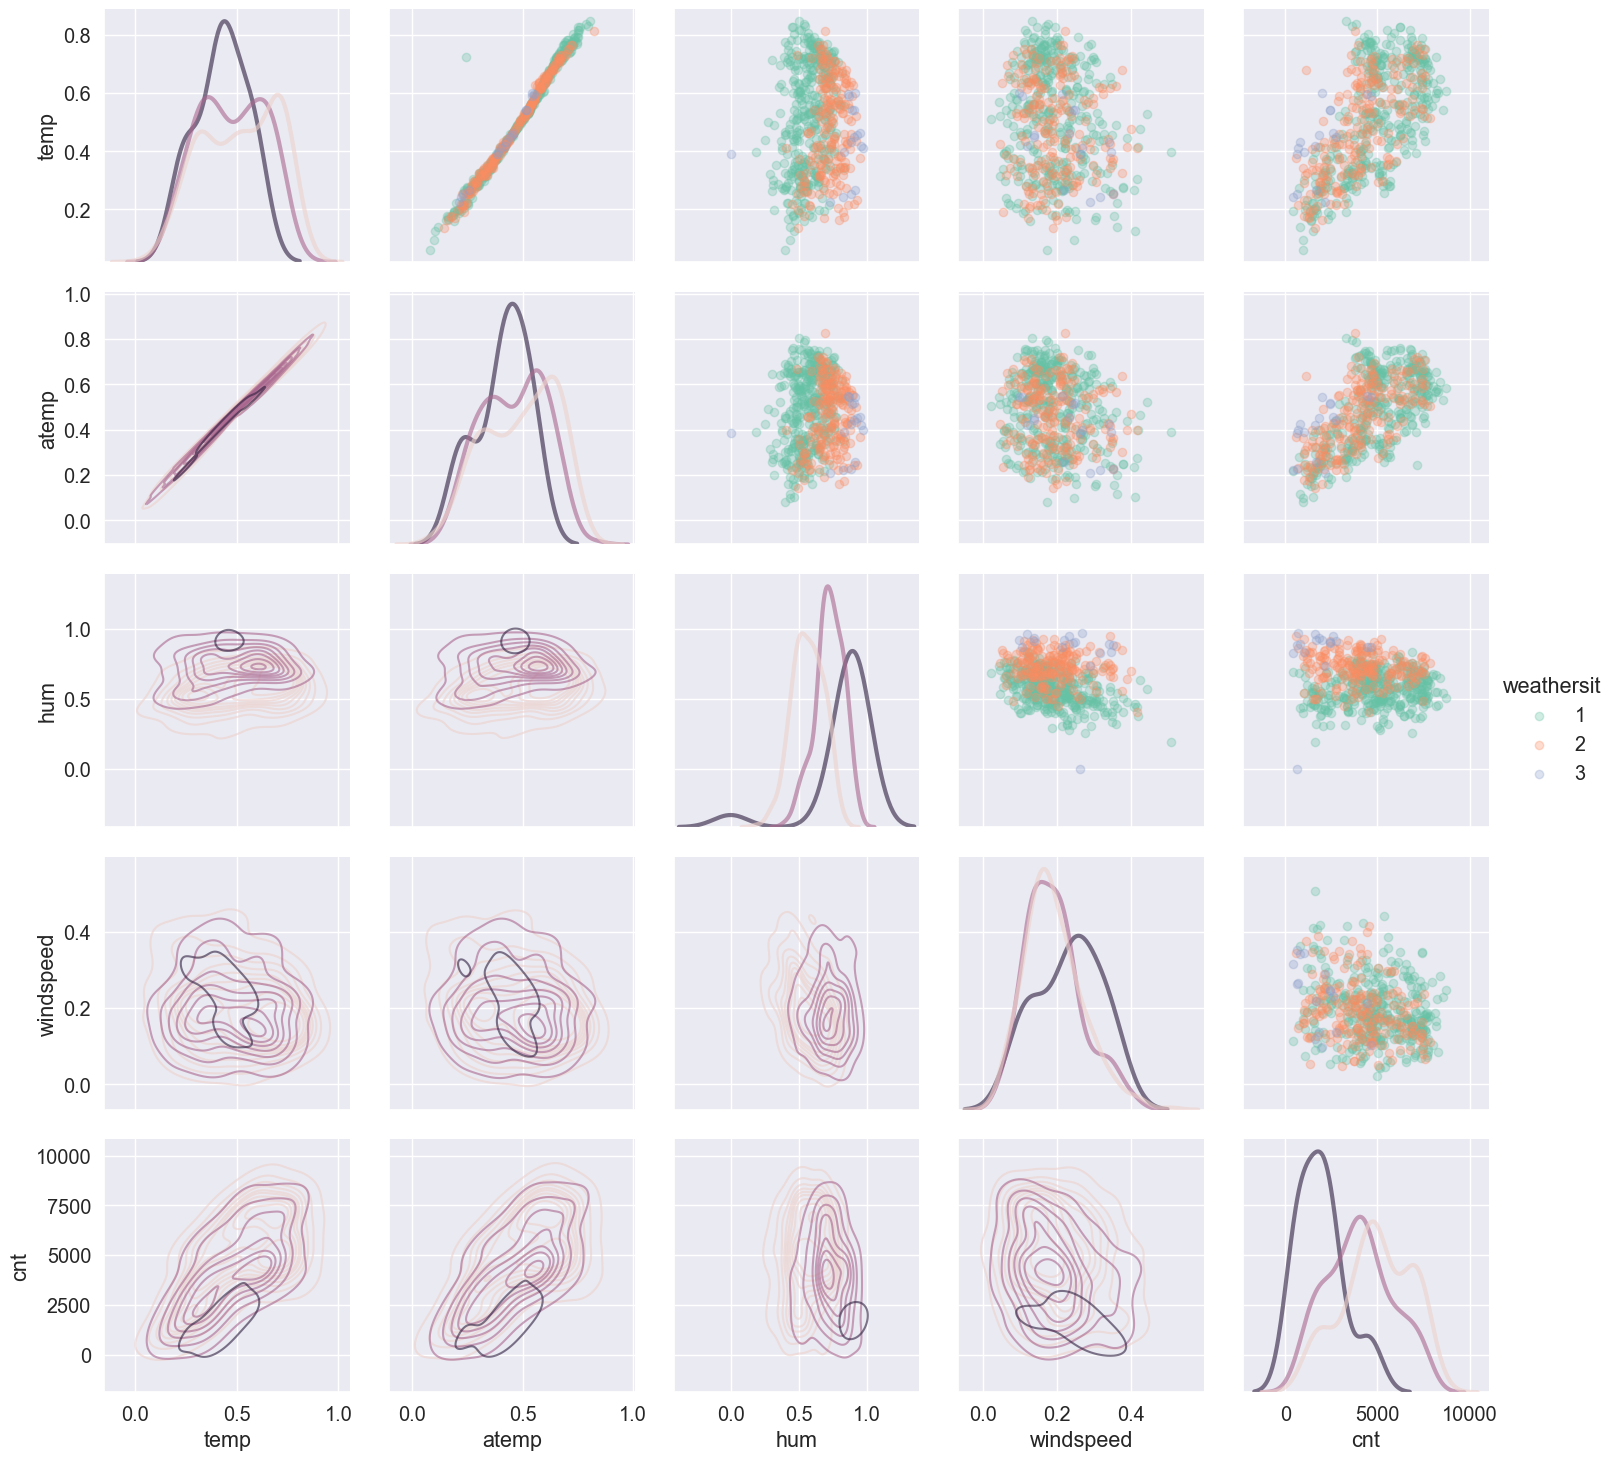

In [8]:
for hue in categorial_features:
    g = sns.PairGrid(
        train[["temp", "atemp", "hum", "windspeed", target, hue]],
        hue=hue,
        diag_sharey=False,
        height=3,
    )

    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)

    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



Выводы по графикам:
Во-первых, количество арендованных велосипедов прямо пропорционально уровню ощущаемой температуры. Во-вторых, количество аренд больше всего летом и меньше - зимой. Помимо того, температура и ощущаемая температура зависимы и хорошо бы исключить один из этих признаков.
Что касается выборсов, то их немного, и в целом данные расположены довольно кучно. Так что рассматривать какие-либо нелинейные функции не нужно, ведь графики довольно презентативны и без этого.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Избавимся от выбросов.

**б).** Закодируем категориальные признаки.

Реализуйте данную процедуру.

Избавимся от выбросов:

In [9]:
for col in real_features:
    train = train[
        (train[col] < train[col].quantile(0.99)) & (train[col] > train[col].quantile(0.01))
    ]
    test = test[
        (test[col] < test[col].quantile(0.99)) & (test[col] > test[col].quantile(0.01))
    ]

Закодируем категориальные признаки:

In [10]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
train_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]], shape=(536, 24))

In [11]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(536, 28)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [12]:
model = LinearRegression()
model.fit(X_train, train[target])

LinearRegression()

In [13]:
np.set_printoptions(suppress=True)
np.round(model.coef_, 2)

array([ 6524.64,  1115.68, -3900.55, -4266.67,   970.12,   699.9 ,
        1321.59,   -61.41,   -93.85,  -350.14,  -282.92,  -707.15,
        -918.83,  -825.05,   231.23,   194.78,  -231.02,  -163.64,
        -578.68,   -61.97,  -181.  ,   -86.47,    19.49,    45.49,
         266.08,   314.21,  -158.22, -1257.62])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [14]:
test_cat = encoder.transform(test[categorial_features])

X_test = np.hstack([test[real_features], test_cat])

In [15]:
test_preds = model.predict(X_test)

In [16]:
# RMSE
np.round(metrics.mean_squared_error(test[target], test_preds) ** 0.5, 2)

np.float64(1282.87)

In [17]:
# MAE
np.round(metrics.mean_absolute_error(test[target], test_preds), 2)

np.float64(1109.81)

In [18]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()


np.round(mean_absolute_percentage_error(test[target], test_preds), 2)

np.float64(115.08)

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [19]:
my_koefs = (
    (np.linalg.inv(X_train.transpose() @ X_train)) @ X_train.transpose() @ train[target]
)
np.round(my_koefs, 2)

array([ 2607546.77, -2813937.07,    53185.81,    52602.74,   -10443.89,
          -8955.96,    38013.65,    21431.19,     4191.81,    16680.22,
          20411.38,     6209.26,   -31567.62,   -39714.05,   -17484.3 ,
         -13760.7 ,    -5521.26,   -10607.43,     9595.3 ,   -10639.05,
         -10945.23,   -19323.93,   -18973.07,   -21051.64,      600.09,
          23482.84,     -488.8 ,    -2057.12])

Посчитаем качество:

In [20]:
print("RMSE: ", round(np.sqrt(((test[target] - X_test @ my_koefs) ** 2).mean()), 2))
print("MAE: ", round(np.abs((test[target] - X_test @ my_koefs).mean()), 2))
print("MAPE: ", round(mean_absolute_percentage_error(test[target], X_test @ my_koefs), 2))

RMSE:  35654.0
MAE:  769.68
MAPE:  1307.21


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

У нас есть очевидная проблема: много зависимых признаков: temp зависит atemp; от holiday и weekday зависит workingday; season зависит от mnth, из-за чего матрица, которую мы обращаем при применении МНК, оказывается близкой к вырожденной.

Уберем же лишние признаки.

In [21]:
real_features = ["atemp", "hum", "windspeed"]
categorial_features = ["mnth", "holiday", "weekday", "weathersit"]
target = "cnt"

Закодируем и обучим модель заново:

In [22]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
X_train = np.hstack([np.ones((train.shape[0], 1)), train[real_features], train_cat])

test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([np.ones((test.shape[0], 1)), test[real_features], test_cat])

In [23]:
my_koefs = (
    (np.linalg.inv(X_train.transpose() @ X_train)) @ X_train.transpose() @ train[target]
)
np.round(my_koefs, 2)

array([ 3356.07,  7826.36, -3859.13, -4104.98,   -47.75,   300.76,
         702.11,   848.57,   446.9 ,    89.8 ,   220.56,  1291.39,
        1600.12,  1119.97,   654.12,  -915.72,   284.88,   160.15,
         271.97,   399.76,   384.46,   268.05,  -158.85, -1227.64])

Посмотрим теперь на ошибку предсказания:

In [24]:
print("RMSE: ", round(np.sqrt(((test[target] - X_test @ my_koefs) ** 2).mean()), 2))
print("MAE: ", round(np.abs((test[target] - X_test @ my_koefs).mean()), 2))
print("MAPE: ", round(mean_absolute_percentage_error(test[target], X_test @ my_koefs), 2))

RMSE:  1328.82
MAE:  119.36
MAPE:  121.22


Как видим, мы удачно избавились от зависимых признаков, и качество предсказаний заметно выросло.

Сделайте выводы.

**Выводы:**

Итак, мы вспомнили, как решать задачу линейной регрессии методом наименьших квадратов, и приеменили МНК для обучения модели, предсказывающей спрос на аренду велосипедов, получив ошибку предсказаний 39% при правильной предобработке данных. Даный результат почти так же хорош, как точность предсказания модели, обученной нами с помощью sklearn: ошикба - 35%. Тем не менее, если бы при использовании МНК мы не убрали зависимые признаки (зависимость определили по графикам и из здравого смысла), а также, не исключили выбросы, то ошибка модели была бы огромной (390% только из-за наличия зависимых признаков). Это пзволяет убедиться, насколько важна грамотная обработка данных перед обучением модели.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели.

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

**Решение**:

Заметим, что функция потерь в модели Ridge-регрессии зависит от $\|\theta\|^2$, а значит, непосредственно от самих признаков. Но различные признаки могут иметь различные единицы измерения, неразумно сравнивать разные единицы измерения, так как это приводит к смещению оценок

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [25]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        """
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        """

        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def fit(self, X, Y):
        """
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        """

        # Посчитайте оценки коэффициентов и, возможно,
        # еще что-то, что пригодится в predict.

        # X = np.vstack(([np.hstack(([1.0], x)) for x in X]))
        # Y = np.vstack(([y for y in Y]))

        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.coef_ = (
            np.linalg.inv(np.transpose(X) @ X + self.lambd * np.identity(X.shape[1]))
            @ np.transpose(X)
            @ Y
        )
        self.coef_[0] *= self.fit_intercept

        return self

    def predict(self, X):
        """
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        """

        # Посчитайте предсказания
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        predictions = X @ self.coef_

        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

Загрузим данные заново и разделим на обучающую, валидационную и тестовую:

In [26]:
data = pd.read_csv("dataset.csv")
data = data[
    [
        "season",
        "mnth",
        "holiday",
        "weekday",
        "workingday",
        "weathersit",
        "temp",
        "atemp",
        "hum",
        "windspeed",
        "cnt",
    ]
]
data

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed   cnt  
0    0.363625  0.805833   0.160446   985  
1    0.353739  0.696087   0.248539   801  
2    0.189405  0.437273   0.248309  1349  
3    0.212122  0.590435   0.160296  1562  
4    0.229270  0.436957   0.186900  1600  
..        ...       ...        ...   ...  
726  0.226642  0.652917   0.350133  2114  
727  0.255046  0.590000   0.155471  3095  
728  0.242400  0.752917   0.124383  1341  
729  0.231700  0.483333   0.350754  1796  
730  0.223487  0.577500   0.154846  2729  

[731 rows x 11 columns]

In [27]:
train, validate = train_test_split(data, test_size=0.2)
train, test = train_test_split(train, test_size=0.25)
print("Размер обучающей выборки:", train.shape)
print("Размер валидационной выборки:", validate.shape)
print("Размер тестовой выборки:", test.shape)

Размер обучающей выборки: (438, 11)
Размер валидационной выборки: (147, 11)
Размер тестовой выборки: (146, 11)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

Выделим категориальные и вущественные признаки:

In [28]:
real_features = ["temp", "atemp", "hum", "windspeed"]
categorial_features = [
    "season",
    "mnth",
    "holiday",
    "weekday",
    "workingday",
    "weathersit",
]
target = "cnt"

Для вещественных признаков удалим выбросы:

In [29]:
for col in real_features:
    train = train[
        (train[col] < train[col].quantile(0.99))
        & (train[col] > train[col].quantile(0.01))
    ]
    validate = validate[
        (validate[col] < validate[col].quantile(0.99))
        & (validate[col] > validate[col].quantile(0.01))
    ]
    test = test[
        (test[col] < test[col].quantile(0.99)) & (test[col] > test[col].quantile(0.01))
    ]

Закодируем категориальные признаки:

In [30]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
validate_cat = encoder.transform(validate[categorial_features])
test_cat = encoder.transform(test[categorial_features])

Стандартизируем признаки, предварительно объединив категориальные и вещественные признаки:

In [31]:
scaler = MinMaxScaler()

X_train = np.hstack([train[real_features], train_cat])
X_validate = np.hstack([validate[real_features], validate_cat])
X_test = np.hstack([test[real_features], test_cat])

X_train = scaler.fit_transform(X_train)
X_validate = scaler.fit_transform(X_validate)
X_test = scaler.fit_transform(X_test)

print("Размер обучающей выборки:", X_train.shape)
print("Размер валидационной выборки:", X_validate.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (398, 28)
Размер валидационной выборки: (131, 28)
Размер тестовой выборки: (130, 28)


Обучим модель при $\lambda = 1$:

In [32]:
model = RidgeRegression(lambd=1)
model.fit(X_train, train[target])

np.set_printoptions(suppress=True)
print("Свободный коэффициент: ", round(model.fit_intercept * model.coef_[0], 2))
print("Оценки коэффициентов: ", np.round(model.coef_[1:], 2))

Свободный коэффициент:  2781.69
Оценки коэффициентов:  [ 2526.68  1751.89 -2087.25  -874.16   451.25   318.36  1563.76   329.59
   384.56   489.49   553.15   248.59  -248.31   450.11  1183.8    461.58
  -120.88   -77.88  -264.83  -267.74  -143.46   -15.69   158.3    280.4
   134.33   276.64  -158.11 -1253.25]


Предсказания:

In [33]:
test_preds = model.predict(X_test)

Посмотрим на ошибки предсказаний:

In [34]:
print("RMSE:", round(metrics.mean_squared_error(test[target], test_preds) ** 0.5, 2))
print("MAE:", round(metrics.mean_absolute_error(test[target], test_preds), 2))
print(
    "MAPE: ",
    round(mean_absolute_percentage_error(test[target], test_preds), 2),
    "%",
    sep="",
)

RMSE: 1315.22
MAE: 1148.42
MAPE: 33.08%


Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [35]:
models = []

RMSE_validate_quality = []
MAE_validate_quality = []
MAPE_validate_quality = []

for l in np.logspace(-10, 20, base=2):
    model = RidgeRegression(lambd=l, fit_intercept=False)
    model.fit(X_train, train[target])

    models.append(model)
    val_pred = model.predict(X_validate)
    RMSE_validate_quality.append(
        metrics.mean_squared_error(validate[target], val_pred) ** 0.5
    )
    MAE_validate_quality.append(metrics.mean_absolute_error(validate[target], val_pred))
    MAPE_validate_quality.append(
        mean_absolute_percentage_error(validate[target], val_pred)
    )

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

In [36]:
def plot_metrics(metric, quality):
    plt.figure(figsize=(16, 4))

    plt.plot(np.logspace(-10, 20, base=2), quality)

    plt.ylabel("Значение метрики " + metric)
    plt.xlabel("Значение гиперпараметра\n")
    plt.title("Зависимость значения метрики от гиперпараметра")
    plt.locator_params(axis="x", nbins=25)
    plt.xlim((-0.1, 50))
    plt.ylim((0, max(quality)))

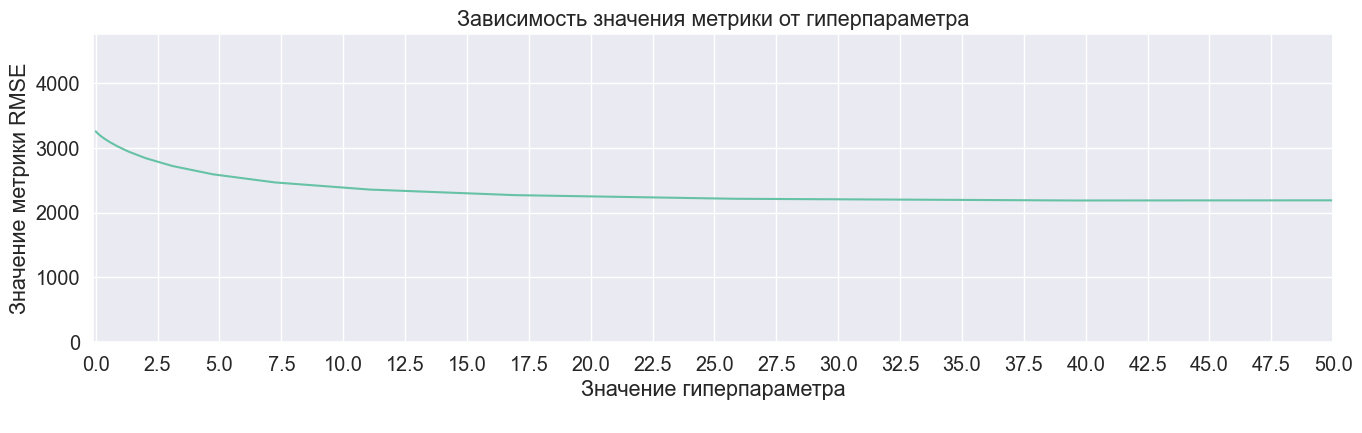

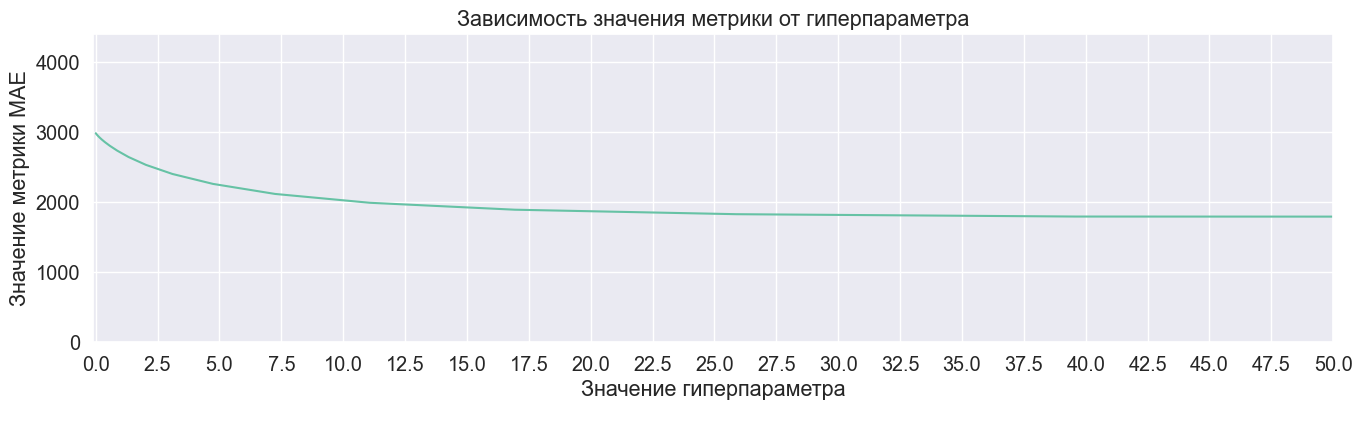

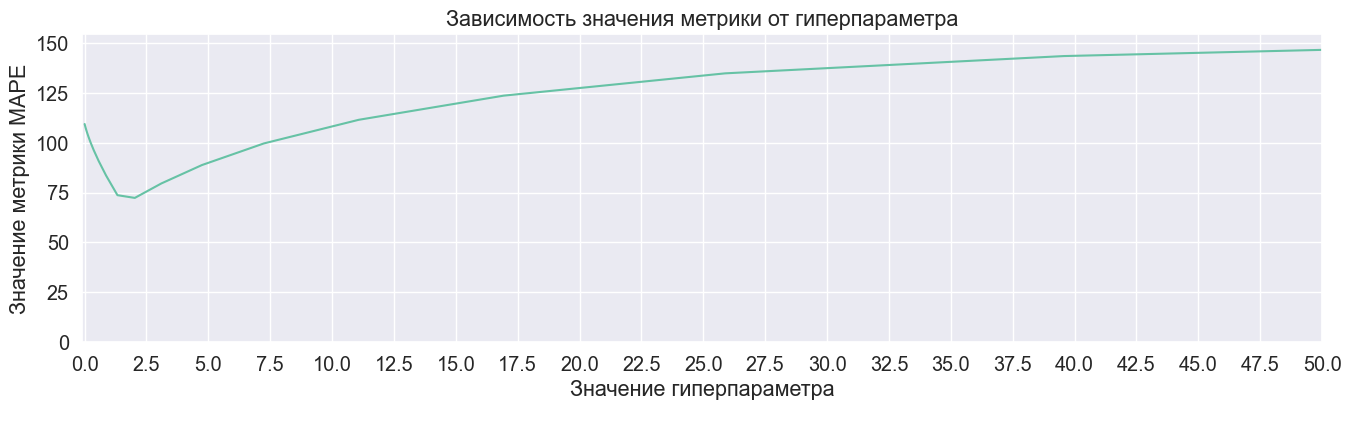

In [37]:
plot_metrics("RMSE", RMSE_validate_quality)
plot_metrics("MAE", MAE_validate_quality)
plot_metrics("MAPE", MAPE_validate_quality)

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Наиболее оптимальное значение гиперпараметра при отсутствии свободного коэффициента - это $\lambda = 45$:

In [38]:
model = RidgeRegression(lambd=45, fit_intercept=False)
model.fit(X_train, train[target])

test_preds = model.predict(X_test)

print("RMSE:", round(metrics.mean_squared_error(test[target], test_preds) ** 0.5, 2))
print("MAE:", round(metrics.mean_absolute_error(test[target], test_preds), 2))
print(
    "MAPE: ",
    round(mean_absolute_percentage_error(test[target], test_preds), 2),
    "%",
    sep="",
)

RMSE: 2285.68
MAE: 1878.92
MAPE: 43.38%


При наличии свободного коэффициента:

In [39]:
model = RidgeRegression(lambd=0.1)
model.fit(X_train, train[target])

test_preds = model.predict(X_test)

print("RMSE:", round(metrics.mean_squared_error(test[target], test_preds) ** 0.5, 2))
print("MAE:", round(metrics.mean_absolute_error(test[target], test_preds), 2))
print(
    "MAPE: ",
    round(mean_absolute_percentage_error(test[target], test_preds), 2),
    "%",
    sep="",
)

RMSE: 1319.39
MAE: 1141.06
MAPE: 31.84%


Сделайте выводы.

**Вывод**. Итак, мы реализовали модель Ridge-регрессии. Как мы поняли из задачи 3, данная модель позволяет справиться с вырожденностью той самой матрицы. Но при отсутствии свободного коэффициента даже при самом удачном значении гиперпараметра ошибка составляет 39,5%. Если же все же учитывать свободный коэффициент, то ошибка составляет меньше 30% при любых значениях гиперпараметра в диапазоне (0; 100). То есть определенно стоит использовать свободный коэффициент даже в модели Ridge-регрессии, где, казалось бы, другие методы борьбы с зависимыми признаками.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [40]:
epsilon = 0.0001

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [41]:
def batch_choise(theta, X, Y, rate=epsilon, lambd=0.1, batch_size=128):
    index = np.random.choice(np.arange(X.shape[0]), size=batch_size)

    X = X[index]
    Y = Y[index]

    return theta - rate * (np.transpose(X) @ (X @ theta - Y) + lambd * theta)


def predict(theta, X):
    X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    return X @ theta

In [42]:
RMSE_validate_quality = []
MAE_validate_quality = []
MAPE_validate_quality = []

X = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
theta = np.zeros(X.shape[1])

for i in range(8000):
    validate_pred = predict(theta, X_validate)
    theta = batch_choise(theta, X, train[target].to_numpy())

    RMSE_validate_quality.append(
        metrics.mean_squared_error(validate[target], validate_pred) ** 0.5
    )
    MAE_validate_quality.append(
        metrics.mean_absolute_error(validate[target], validate_pred)
    )
    MAPE_validate_quality.append(
        mean_absolute_percentage_error(validate[target], validate_pred)
    )

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [43]:
def plot_metrics_SGD(metric, quality):
    plt.figure(figsize=(10, 4))

    plt.plot(np.arange(0, 8000), quality)

    plt.ylabel("Значение " + metric)
    plt.xlabel("Значение гиперпараметра\n")
    plt.title("Зависимость значения метрики от количества итераций");

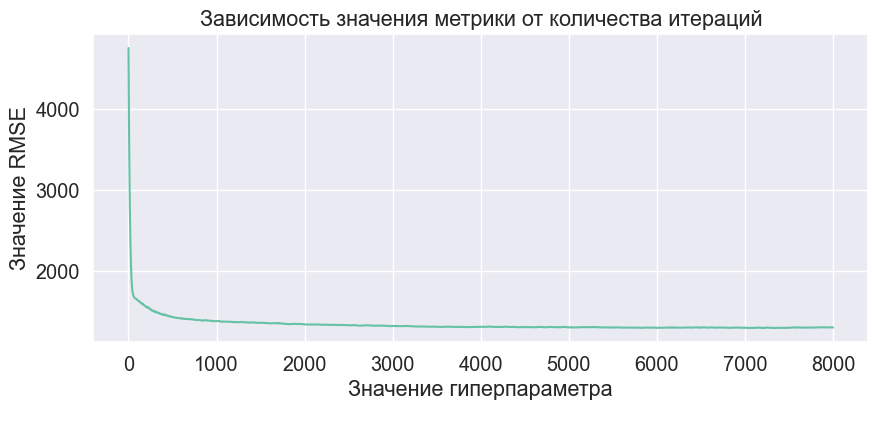

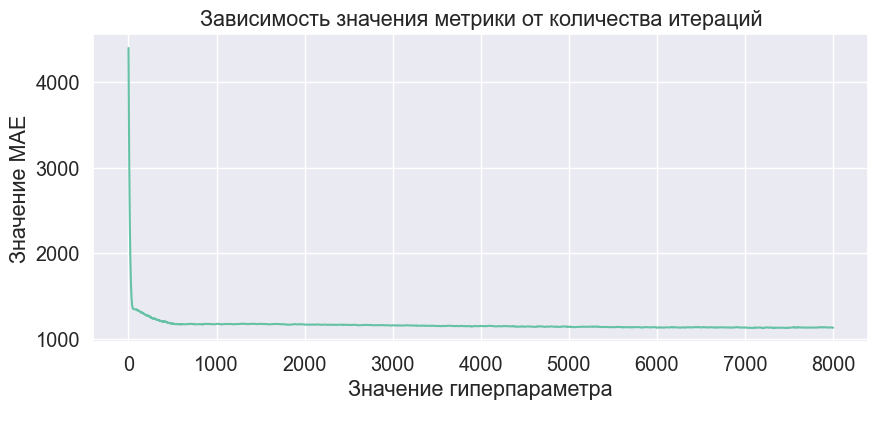

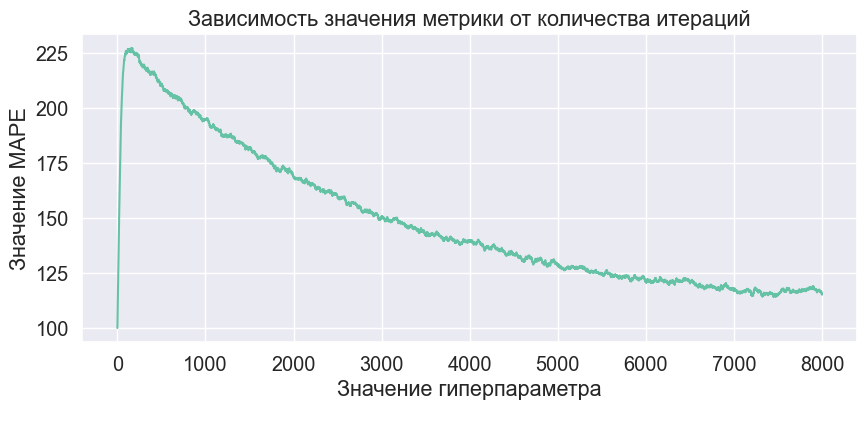

In [44]:
plot_metrics_SGD("RMSE", RMSE_validate_quality)
plot_metrics_SGD("MAE", MAE_validate_quality)
plot_metrics_SGD("MAPE", MAPE_validate_quality)

Посчитайте ошибку на тестовой выборке.

In [45]:
print("RMSE:", metrics.mean_squared_error(test[target], predict(theta, X_test)) ** 0.5)
print("MAE:", metrics.mean_absolute_error(test[target], predict(theta, X_test)))
print("MAPE:", mean_absolute_percentage_error(test[target], predict(theta, X_test)))

RMSE: 1318.5443847145682
MAE: 1151.6713995582286
MAPE: 33.15088976843787


Сделайте выводы.

Итак, мы применили стохастический градиентный спуск для реализации Ridge-регрессии и получили ошибку 26%.
То есть помимо того, что стохастический сградиентный спуск работает быстрее на больших данных, он еще и показал точность не хуже обычной ridge-регрессии. У нас получилось этого достичь благодаря выбору количесва итераций (8000 в нашем случае) и величины шага.